# Notebook Dedicated to Build the real data distribution vs the MC model of B8 Solar Nue + Tl208

In [1]:
import numpy as np

import glob
import re
import os

import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import cm

# Load the Data

In [2]:
# ------- Observable list -------

#Define the name of the observables to be loaded. It will be applied to MC and Data, correspondingly
obs_list_solar_mc = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'n_init_evs', 'Pee', 'energy_corrected']
obs_list_tl208_mc = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'n_init_evs', 'energy_corrected']
obs_list_data = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'energy_corrected']

## General Cuts Definition

In [3]:
posr_cut = 5500
en_inf_cut = 5

## MC Data

### $\nu_e$ Boron-8

In [4]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/non_osc/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Nue_mc = {obs: np.array([]) for obs in obs_list_solar_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_solar_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Nue_mc[obs] = np.append(obs_dict_b8_Nue_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_b8_Nue_mc['posr_av'] <= posr_cut) & (obs_dict_b8_Nue_mc['energy_corrected'] >= en_inf_cut)

# ---- Choose observables ----
n_init_evs_b8_Nue_mc = obs_dict_b8_Nue_mc['n_init_evs']
energy_b8_Nue_mc = obs_dict_b8_Nue_mc['energy'][cut_condition]
energy_corr_b8_Nue_mc = obs_dict_b8_Nue_mc['energy_corrected'][cut_condition]
#Pee_b8_Nue_mc = obs_dict_b8_Nue_mc['Pee'][cut_condition]

### $\nu_e$ Boron-8 with Rejection Sampling to simulate Oscillations

In [5]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/osc/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Nue_mc = {obs: np.array([]) for obs in obs_list_solar_mc + ['energy_corrected']}

# ------- Load and save observables in dictionary -------
for obs in obs_list_tl208_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Nue_mc[obs] = np.append(obs_dict_b8_Nue_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_b8_Nue_mc['posr_av'] <= posr_cut) & (obs_dict_b8_Nue_mc['energy_corrected'] >= en_inf_cut)

# ---- Choose observables ----
n_init_evs_b8_osc_Nue_mc_rs = obs_dict_b8_Nue_mc['n_init_evs']
energy_b8_osc_Nue_mc_rs = obs_dict_b8_Nue_mc['energy'][cut_condition]
energy_corr_b8_osc_Nue_mc_rs = obs_dict_b8_Nue_mc['energy_corrected'][cut_condition]

In [6]:
n_init_evs_b8_osc_Nue_mc_rs

array([349032., 351143.,  59231., 350304., 351497., 348263., 350352.,
       351514., 351527.])

### $\nu_\mu$ Boron-8

In [7]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Numu/osc/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Numu_mc = {obs: np.array([]) for obs in obs_list_solar_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_solar_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Numu_mc[obs] = np.append(obs_dict_b8_Numu_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_b8_Numu_mc['posr_av'] <= posr_cut) & (obs_dict_b8_Numu_mc['energy_corrected'] >= en_inf_cut)

# ---- Choose observables ----
n_init_evs_b8_Numu_mc = obs_dict_b8_Numu_mc['n_init_evs']
energy_b8_Numu_mc = obs_dict_b8_Numu_mc['energy'][cut_condition]
energy_corr_b8_Numu_mc = obs_dict_b8_Numu_mc['energy_corrected'][cut_condition]
#Pee_b8_Numu_mc = obs_dict_b8_Numu_mc['Pee'][cut_condition]

### Tl208

In [8]:
#main_dir = 'E:/Data/solars/mc/bisMSB/tl208/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/tl208/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_tl208_mc = {obs: np.array([]) for obs in obs_list_tl208_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_tl208_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_tl208_mc[obs] = np.append(obs_dict_tl208_mc[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_tl208_mc['posr_av'] <= posr_cut)  & (obs_dict_tl208_mc['energy_corrected'] >= en_inf_cut)

# ---- Choose observables ----
energy_tl208_mc = obs_dict_tl208_mc['energy'][cut_condition]
energy_corr_tl208_mc = obs_dict_tl208_mc['energy_corrected'][cut_condition]
n_init_evs_tl208_mc = obs_dict_tl208_mc['n_init_evs']

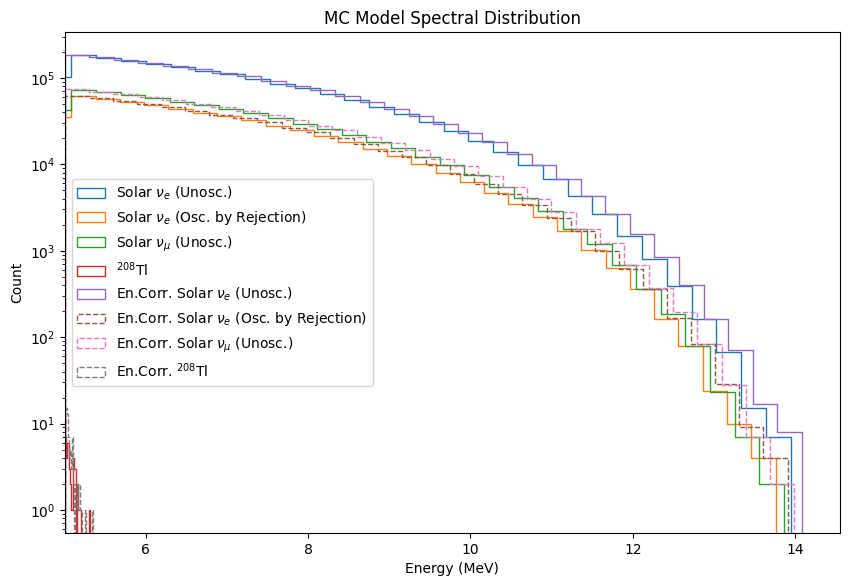

In [9]:
plt.figure(figsize = (10, 6.5))

bins = 30

sn.histplot(energy_b8_Nue_mc, bins = bins, element = 'step', alpha = 0, label = r'Solar $\nu_e$ (Unosc.)')
#sn.histplot(x = energy_b8_Nue_mc, bins = bins, element = 'step', alpha = 0, weights = Pee_b8_Nue_mc , label = r'Solar $\nu_e$ (Osc.)')
sn.histplot(x = energy_b8_osc_Nue_mc_rs, bins = bins, element = 'step', alpha = 0 , label = r'Solar $\nu_e$ (Osc. by Rejection)')
sn.histplot(energy_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, label = r'Solar $\nu_\mu$ (Unosc.)')
#sn.histplot(x = energy_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, weights = Pee_b8_Numu_mc, label = r'Solar $\nu_\mu$ (Osc.)')
sn.histplot(energy_tl208_mc, bins = bins, element = 'step', alpha = 0, label = '$^{208}$Tl')

sn.histplot(energy_corr_b8_Nue_mc, bins = bins, element = 'step', alpha = 0, label = r'En.Corr. Solar $\nu_e$ (Unosc.)')
sn.histplot(x = energy_corr_b8_osc_Nue_mc_rs, bins = bins, element = 'step', alpha = 0 , linestyle="--", label = r'En.Corr. Solar $\nu_e$ (Osc. by Rejection)')
sn.histplot(energy_corr_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, linestyle="--", label = r'En.Corr. Solar $\nu_\mu$ (Unosc.)')
#sn.histplot(x = energy_corr_b8_Numu_mc, bins = bins, element = 'step', alpha = 0, weights = Pee_b8_Numu_mc, linestyle="--", label = r'En.Corr. Solar $\nu_\mu$ (Osc.)')
sn.histplot(energy_corr_tl208_mc, bins = bins, element = 'step', alpha = 0, linestyle="--", label = 'En.Corr. $^{208}$Tl')

plt.xlabel('Energy (MeV)')

plt.yscale('log')
plt.legend(loc = 'best')

plt.title('MC Model Spectral Distribution')

plt.xlim(5,)

plt.show()

## Real Data

In [10]:
# ------- Directory of data -------
#data_type = ['analysis15', 'analysis15_bMR', 'analysis20_bMR']
#main_dir = 'E:/Data/solars/solarnu_Realdata/bisMSB/first_candidates/analysis*/resume_files/'
#main_dir = '/content/drive/MyDrive/SNO+ Analysis/data/solar_data/real_data/bis_MSB/Analysis*/resume_files/'
main_dir = '/home/joankl/data/solars/real_data/bisMSB/first_candidates/analysis*/resume_files/'

# ------- Observable Dictionary -------
obs_dict_data = {obs: np.array([]) for obs in obs_list_data}

# Loop over the observable list to load the data in obs_dict

for obs in obs_list_data:
    obs_dir_list = glob.glob(main_dir + obs + '.npy') # List of directories where the obs is

    # Now loop over the list of directories
    for fdir in obs_dir_list:
        obs_i = np.load(fdir)

        #Save the loaded numpy array in the corresponding key observable in the observable dictioary
        obs_dict_data[obs] = np.append(obs_dict_data[obs], obs_i)

# ---- Cut Condition ----
cut_condition = (obs_dict_data['posr_av'] <= posr_cut) & (obs_dict_data['energy_corrected'] >= en_inf_cut)
        

energy_data = obs_dict_data['energy'][cut_condition]
energy_corr_data = obs_dict_data['energy_corrected'][cut_condition]
#posr_av = obs_dict['posr_av']
#posx = obs_dict['posx']
#posy = obs_dict['posy']
#posz = obs_dict['posz_av']

# MC Data Scaling Factors

Note: Before representing the MC with oscillations, lets only use the non-oscillated MC but use the number of expected events considering oscillations

In [13]:
# ======= Definition of Important Quantities =======

# ------ Dataset Lifetime ------
dataset_lf_time = 322.74  # days

# ------ Expected event rate per day ------
N_b8_unosc_Nue_per_day = 2483.56/365 # nue without oscillations
N_b8_osc_Nue_per_day = 862.65/365 # nue with oscillations
N_b8_Numu_per_day = 289.10/365  # numu after oscillation
N_tl208_per_day = 2.576448     

# ------ MC selection efficiency ------
# 8B Nue
n_init_evs_b8_Nue = np.sum(n_init_evs_b8_Nue_mc)
n_final_evs_b8_Nue = len(energy_b8_Nue_mc)
eff_mc_b8_Nue = n_final_evs_b8_Nue / n_init_evs_b8_Nue

# 8B Nue with Rejection Sampling
n_init_evs_b8_osc_Nue_rs = np.sum(n_init_evs_b8_osc_Nue_mc_rs)
n_final_evs_b8_osc_Nue_rs = len(energy_b8_osc_Nue_mc_rs)
eff_mc_b8_osc_Nue_rs = n_final_evs_b8_osc_Nue_rs / n_init_evs_b8_osc_Nue_rs

# 8B Numu
n_init_evs_b8_Numu = np.sum(n_init_evs_b8_Numu_mc)
n_final_evs_b8_Numu = len(energy_b8_Numu_mc)
eff_mc_b8_Numu = n_final_evs_b8_Numu / n_init_evs_b8_Numu

# Tl208
n_init_evs_tl208 = np.sum(n_init_evs_tl208_mc)
n_final_evs_tl208 = len(energy_tl208_mc)
eff_mc_tl208 = n_final_evs_tl208 / n_init_evs_tl208

# ------ Nº of expected events within Lifetime and cuts ------
N_scaled_mc_b8_unosc_Nue = dataset_lf_time * N_b8_unosc_Nue_per_day * eff_mc_b8_Nue
N_scaled_mc_b8_osc_Nue = dataset_lf_time * N_b8_osc_Nue_per_day * eff_mc_b8_Nue
N_scaled_mc_b8_osc_Nue_rs = dataset_lf_time * N_b8_osc_Nue_per_day * eff_mc_b8_osc_Nue_rs
N_scaled_mc_b8_Numu = dataset_lf_time * N_b8_Numu_per_day * eff_mc_b8_Numu
N_scaled_mc_tl208 = dataset_lf_time * N_tl208_per_day * eff_mc_tl208

# ------ Scaling factors: weight to mc histograms ------
scaling_mc_b8_unosc_Nue = N_scaled_mc_b8_unosc_Nue/n_final_evs_b8_Nue
scaling_mc_b8_osc_Nue = N_scaled_mc_b8_osc_Nue/n_final_evs_b8_Nue
scaling_mc_b8_osc_Nue_rs = N_scaled_mc_b8_osc_Nue_rs/n_final_evs_b8_osc_Nue_rs
scaling_mc_b8_osc_Numu = N_scaled_mc_b8_Numu/n_final_evs_b8_Numu
scaling_mc_tl208 = N_scaled_mc_tl208/n_final_evs_tl208

# ========= Print Quantites =========
print(F'====== For a Dataset Lifetime = {dataset_lf_time:.2f} days ======')
print(f'The expected B8 Nue unoscillated events are {N_scaled_mc_b8_unosc_Nue:.3f} with selection efficiency = {eff_mc_b8_Nue}')
print(f'The expected B8 Nue oscillated events are {N_scaled_mc_b8_osc_Nue:.3f} with selection efficiency = {eff_mc_b8_Nue}')
print(f'The expected B8 Nue oscillated events (with rejection sampling) are {N_scaled_mc_b8_osc_Nue_rs:.3f} with selection efficiency = {eff_mc_b8_osc_Nue_rs}')
print(f'The expected B8 Numu events are {N_scaled_mc_b8_Numu:.3f} with selection efficiency = {eff_mc_b8_Numu}')
print(f'The expected Tl208 events are {N_scaled_mc_tl208} with selection efficiency = {eff_mc_tl208}')

====== For a Dataset Lifetime = 322.74 days ======
The expected B8 Nue unoscillated events are 459.788 with selection efficiency = 0.20937392099291555
The expected B8 Nue oscillated events are 159.704 with selection efficiency = 0.20937392099291555
The expected B8 Nue oscillated events (with rejection sampling) are 150.288 with selection efficiency = 0.19702828951298054
The expected B8 Numu events are 48.634 with selection efficiency = 0.19025470020218394
The expected Tl208 events are 0.042788138657908446 with selection efficiency = 5.145756345081132e-05


# Plots

### - Plot Settings and Styles

In [14]:
font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':11}

font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=9)

### - Tick marker function

Function to plot tick markers on the axis of a plot. Initially, it will be used for the spectral plots

In [15]:
def set_ticks(ax):
    # ---- X axis ----
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.xaxis.set_major_formatter(ScalarFormatter(1))

    # ---- Y axis ----
    #ax.yaxis.set_minor_locator(MultipleLocator(5))
    #ax.yaxis.set_major_formatter(ScalarFormatter())

    # ---- Show ticks on all sides ----
    ax.tick_params(which='minor', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', top=True, bottom=True, left=True, right=True)

## Energy

/tmp/ipykernel_50578/3265976995.py:106: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_bot.set_ylim(0, 5e-2)


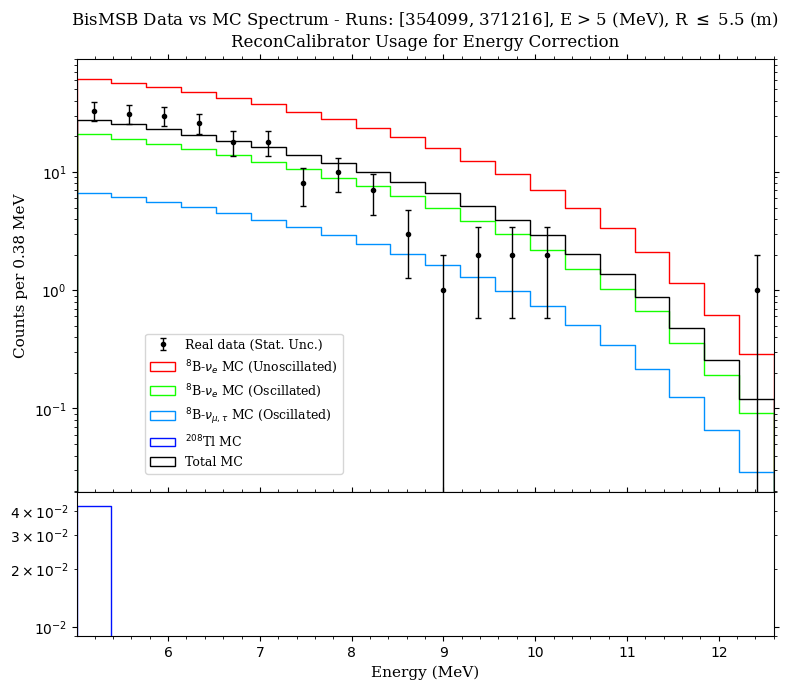

In [16]:
# ----------------------------
# Bins Definition
# ----------------------------
binwidth = 0.38

energy_bins = list(np.arange(min(energy_corr_data),
                             max(energy_corr_data) + binwidth,
                             binwidth))  #These are the energy bin edges

bins_center_energy = (np.array(energy_bins)[:-1] + np.array(energy_bins)[1:])/2


# ===============  MC Distribution ===============
counts_B8_unosc_Nue_mc, _ = np.histogram(energy_corr_b8_Nue_mc, bins = energy_bins, weights = np.ones(len(energy_corr_b8_Nue_mc)) * scaling_mc_b8_unosc_Nue)
#counts_B8_unosc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Nue_mc)) * scaling_mc_b8_unosc_Nue)

counts_B8_osc_Nue_mc, _ = np.histogram(energy_corr_b8_osc_Nue_mc_rs, bins = energy_bins, weights = np.ones(len(energy_corr_b8_osc_Nue_mc_rs))*scaling_mc_b8_osc_Nue_rs)
#counts_B8_osc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = Pee_b8_Nue_mc * scaling_mc_b8_osc_Nue)
#counts_B8_osc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Nue_mc))*scaling_mc_b8_osc_Nue)
#counts_B8_osc_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = Pee_b8_Nue_mc*scaling_mc_b8_unosc_Nue)
#counts_B8_osc_Nue_mc, _ = np.histogram(energy_b8_osc_Nue_mc_rs, bins = energy_bins, weights = np.ones(len(energy_b8_osc_Nue_mc_rs))*scaling_mc_b8_osc_Nue_rs)

#counts_B8_unosc_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Numu_mc)) * scaling_mc_b8_osc_Numu)

counts_B8_osc_Numu_mc, _ = np.histogram(energy_corr_b8_Numu_mc, bins = energy_bins, weights = np.ones(len(energy_corr_b8_Numu_mc)) * scaling_mc_b8_osc_Numu)
#counts_B8_osc_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Numu_mc)) * scaling_mc_b8_osc_Numu)
#counts_B8_osc_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = (1 - Pee_b8_Numu_mc) * scaling_mc_b8_osc_Numu)

counts_tl208_mc, _ = np.histogram(energy_corr_tl208_mc, bins = energy_bins, weights = np.ones(len(energy_corr_tl208_mc)) * scaling_mc_tl208)
#counts_tl208_mc, _ = np.histogram(energy_tl208_mc, bins = energy_bins, weights = np.ones(len(energy_tl208_mc)) * scaling_mc_tl208)

# ----------- Total MC -----------
#total_mc_counts = counts_B8_osc_Nue_mc + counts_B8_unosc_Numu_mc + counts_tl208_mc
total_mc_counts = counts_B8_osc_Nue_mc + counts_B8_osc_Numu_mc + counts_tl208_mc

# =============== Real Data Distribution Points ===============

energy_counts, edges = np.histogram(energy_corr_data, bins = energy_bins)
bins_center_energy = (edges[:-1] + edges[1:])/2
error_bars = np.sqrt(energy_counts)

# Remove zero count points in real data
bins_center_energy_real_data  = bins_center_energy[energy_counts>0]
error_bars = error_bars[energy_counts>0]
energy_counts = energy_counts[energy_counts>0]

# =============== Plots Building ===============

# Define axes: Construct subplots to conveniently represent the low contribution of the 208Tl spectrum
fig, (ax_top, ax_bot) = plt.subplots(2, 1, sharex=True,figsize=(9,7.5),
                                     gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.0})

# --------- Plot functions ---------
# Real data
ax_top.errorbar(bins_center_energy_real_data, energy_counts,
            yerr=error_bars, fmt='.',
            color='black', label='Real data (Stat. Unc.)',
            elinewidth=1, capsize=2)

# MC components
sn.histplot(x=energy_corr_b8_Nue_mc, bins=energy_bins, weights=np.ones(len(energy_corr_b8_Nue_mc))*scaling_mc_b8_unosc_Nue,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Unoscillated)', color = '#ff0000')

#sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights=Pee_b8_Nue_mc*scaling_mc_b8_osc_Nue,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Oscillated)', color = '#15ff00')

#sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights =  np.ones(len(energy_b8_Nue_mc))*scaling_mc_b8_osc_Nue,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Oscillated)', color = '#15ff00')

sn.histplot(x=energy_corr_b8_osc_Nue_mc_rs, bins=energy_bins, weights =  np.ones(len(energy_corr_b8_osc_Nue_mc_rs))*scaling_mc_b8_osc_Nue_rs,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Oscillated)', color = '#15ff00')

#sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights =  Pee_b8_Nue_mc*scaling_mc_b8_unosc_Nue,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC (Oscillated)', color = '#15ff00')

#sn.histplot(x=energy_b8_Numu_mc, bins=energy_bins, weights=np.ones(len(energy_b8_Numu_mc))*scaling_mc_b8_osc_Numu,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC (Unoscillated)', color = '#ff00e6')

sn.histplot(x=energy_corr_b8_Numu_mc, bins=energy_bins, weights=np.ones(len(energy_corr_b8_Numu_mc))*scaling_mc_b8_osc_Numu,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC (Oscillated)', color = '#0091ff')

#sn.histplot(x=energy_b8_Numu_mc, bins=energy_bins, weights=(1 - Pee_b8_Numu_mc)*scaling_mc_b8_osc_Numu,
#            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC (Oscillated)', color = '#0091ff')

sn.histplot(x=energy_corr_tl208_mc, bins=energy_bins, weights=np.ones(len(energy_corr_tl208_mc))*scaling_mc_tl208,
            element='step', alpha=0, ax=ax_bot, label=r'$^{208}$Tl MC', color = '#0011ff')

#ax_top.hist(bins_center_energy, bins=energy_bins, weights = counts_B8_Nue_mc,
#            histtype='step', linewidth=1.0, label=r'Osc. $^8$B-$\nu_e$ MC', color = '#16fc05')

ax_top.hist(bins_center_energy, bins = energy_bins, weights = total_mc_counts, histtype='step', 
            color='black', linewidth=1.0, label='Total MC')

# --------- Axes Settings ---------

#Scale
ax_top.set_yscale('log')
ax_bot.set_yscale('log')

#Ticks
set_ticks(ax_top)
set_ticks(ax_bot)

#axis limits
ax_top.set_xlim(edges[0], edges[-1])
ax_bot.set_ylim(0, 5e-2)

# --------- Titles ---------

ax_bot.set_xlabel('Energy (MeV)', fontdict = font_style_axis)
ax_top.set_ylabel(f'Counts per {binwidth} MeV', fontdict = font_style_axis)
ax_bot.set_ylabel('')

# ---- Build a single legend combining both axes ----
#Order to appear the Legends
order = ['Real data (Stat. Unc.)',
         r'$^8$B-$\nu_e$ MC (Unoscillated)',
         r'$^8$B-$\nu_e$ MC (Oscillated)',
         #r'$^8$B-$\nu_{\mu,\tau}$ MC (Unoscillated)',
         r'$^8$B-$\nu_{\mu,\tau}$ MC (Oscillated)',
         r'$^{208}$Tl MC',
         'Total MC'
         ]

handles_top, labels_top = ax_top.get_legend_handles_labels()
handles_bot, labels_bot = ax_bot.get_legend_handles_labels()

handles = handles_top + handles_bot
labels  = labels_top  + labels_bot

label_to_handle = dict(zip(labels, handles))
ordered_handles = [label_to_handle[l] for l in order]

ax_top.legend(ordered_handles, order, bbox_to_anchor=(0.24, 0.38), prop = font_prop)
# ------------------ end of common legends-------------------

ax_top.set_title(fr'BisMSB Data vs MC Spectrum - Runs: [354099, 371216], E > 5 (MeV), R $\leq$ {posr_cut*10**(-3)} (m)' + '\n' + 'ReconCalibrator Usage for Energy Correction', fontdict = font_style_title, y = 1.01)

plt.show()

# Ratio and Residual Energy Plot (between different normalizations)

The idea is to plot the ratio between the counts on each energy bin of the histograms normalized by two different ways in an attempt to represent MC oscillations:
- One normalization use uniquely the number of expected events with oscillations (without applying Pee directly). (norm1)
- The other uses the number of expected events unoscillations, with the normalization by Pee. (norm2)

Ratio = counts(norm1)/counts(norm2)

Residual = counts(norm1) - counts(norm2)